In [3]:
from heston import (
    cir_step,
    heston_step,
    heston_call_quad,
    heston_cdf,
    heston_density_quad,
    heston_characteristic,
)
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Heston
| Check|Passed | 
| -- | -- |
| Calls Decreasing in Strike | ✅ |
| Calls above intrinsic value | ✅ |
| Calls for ttm = 0 are intrinsic value | ✅ |
| CDF bounded by 0 and 1| ✅ |
| CDF increasing | ✅ |
| CDF for ttm = 0 looks like dirac | ✅ |
| Non-negtive density | ✅ |

+ Heston call price is wrong

  0%|          | 0/30 [00:00<?, ?it/s]

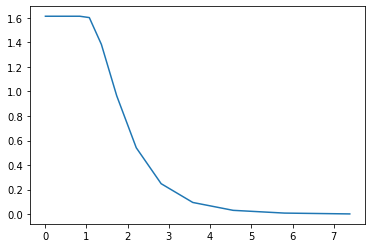

In [8]:
tau = 1
v = 0.2
kappa = 0
vbar = 0.2
vol_of_vol = 0.2
rho = 0
ks = np.linspace(-5, 2, 30)
from scipy.integrate import quad


def heston_call_quad(k, tau, v, kappa, vbar, vol_of_vol, rho):
    func = lambda u: heston_density_quad(u, tau, v, kappa, vbar, vol_of_vol, rho)
    vec_fun = np.vectorize(func)
    grid = np.linspace(k, 100, 100)
    dx = np.diff(grid)[0]
    # return np.sum(np.maximum(np.exp(grid) - 1.0, 0) * vec_func(grid) * dx)
    return quad(
        lambda y: np.maximum((np.exp(y) - 1.0), 0) * func(y),
        k,
        10,
        limit=30,
        epsabs=1e-6,
        epsrel=1e-6,
    )[0]


calls = [heston_call_quad(k, tau, v, kappa, vbar, vol_of_vol, rho) for k in tqdm(ks)]
plt.plot(np.exp(ks), calls)
# heston_call_quad(1e-2, tau, v, kappa, vbar, vol_of_vol, rho)

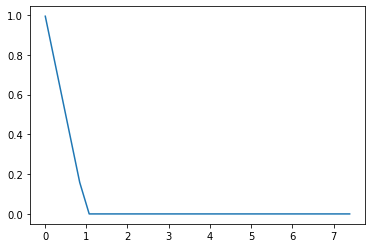

In [12]:
plt.plot(np.exp(ks), np.maximum(1.0 - np.exp(ks), 0))

In [ ]:
plt.plot(
    xs,
    [
        heston_density(x, tau=1, v=0.2, kappa=0, vbar=0.2, vol_of_vol=0.2, rho=0)
        for x in xs
    ],
)

In [78]:
%%time
c_func = lambda u: heston_characteristic(u, tau, v, kappa, vbar, vol_of_vol, rho)
a1 = (
    0.5
    * np.pi
    * quad(lambda u: np.real(np.exp(c_func(u) + 1j * u * k)), 0, 100, limit=1000)[0]
)
a1

CPU times: user 5.08 ms, sys: 164 µs, total: 5.25 ms
Wall time: 5.25 ms


4.409686546685554

In [84]:
%%time
c_func = lambda u: heston_characteristic(u, tau, v, kappa, vbar, vol_of_vol, rho)
grid = np.linspace(1e-9, 100, 1000)
dx = np.diff(grid)[0]
func2 = lambda u: np.real(np.exp(c_func(u) + 1j * u * k))
a1 = 0.5 * np.pi * np.sum(func2(grid) * dx)
a1

CPU times: user 1.49 ms, sys: 1.05 ms, total: 2.54 ms
Wall time: 2.3 ms


4.488304979888767

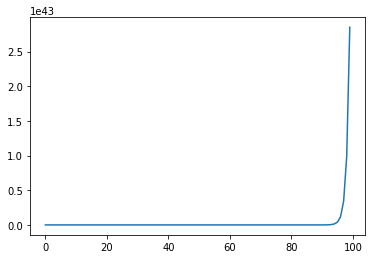

In [17]:
import matplotlib.pyplot as plt

plt.plot(np.maximum(np.exp(grid) - 1.0, 0) * dx)

In [83]:
%%time
func = lambda u: heston_density_quad(u, tau, v, kappa, vbar, vol_of_vol, rho)
vec_func = np.vectorize(func)
grid = np.linspace(k, 100, 100)
dx = np.diff(grid)[0]
a2 = quad(lambda y: np.maximum((np.exp(y) - 1.0), 0) * func(y), k, 6, limit=30)[0]

CPU times: user 542 ms, sys: 8.65 ms, total: 551 ms
Wall time: 565 ms


# SABR
| Check|Passed | 
| -- | -- |
| Calls Decreasing in Strike | ✅ |
| Calls above intrinsic value | ✅ |
| Calls for ttm = 0 are intrinsic value | ✅ |
| CDF bounded by 0 and 1| ✅ |
| CDF increasing | ✅ |
| CDF for ttm = 0 looks like dirac | ✅ |